## Monitoring regional development in Bolivia


The project will support the University of Nagoya's Education and Research Center for Sustainable Co-Development based in Japan. We will be working on this project in unison with the DSSD Hub at the University of Wisconsin.

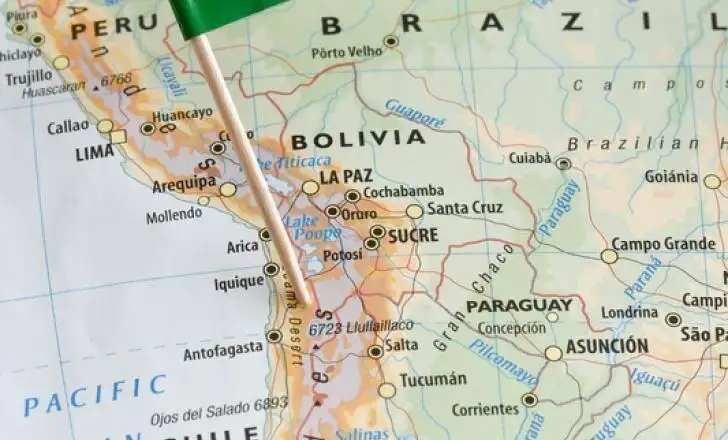

## Installing Libraries 

In [1]:
!pip install geopandas


In [2]:
!pip install pandas

In [3]:
!pip install numpy

In [4]:
!pip install plotly

## Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### Data Source

In [6]:
col_info_link =r"https://gist.githubusercontent.com/cmg777/979285c2bcde9832dd9cc0ee0fe9062d/raw/c4befc87572a744a7cd66b54ac233412a5f4ec2f/DataDefinitions.csv"
data_set_link=r"https://gist.githubusercontent.com/cmg777/788a6c962f2d8f217ca44ff5dc567b5c/raw/ad1e0fd5b086eab7d90f5ba126c7839d4940f2e1/GeoDS4Bolivia.geojson"

## Variable Description

In [7]:
var_info=pd.read_csv(col_info_link)

In [8]:
var_info

,Variable,Label
0,poly_id,Polygon ID
1,asdf_id,ASDF ID
2,mun,Municipality
3,mun_id,Municipality ID
4,dep,Department
5,dep_id,Department ID
6,dep_mun,Department-municipality
7,shapeID,Municipality Geoquery Polygon ID
8,imds,Municipal Sustainable Development Index
9,rank_imds,Bolivia Index Ranking


## loading the dataset

In [9]:
gdf = gpd.read_file(data_set_link)

In [10]:
gdf.head(3)

,asdf_id,shapeName,COORD_X,COORD_Y,poly_id,mun,mun_id,dep,dep_id,dep_mun,shapeID,imds,rank_imds,population_2020,urbano_2012,sdg1_1_eepr,sdg1_1_ubn,sdg1_2_mpi,sdg1_4_abs,sdg2_2_cmc,sdg2_2_oww,sdg2_4_pual,sdg2_4_td,sdg3_1_idca,sdg3_2_imr,sdg3_2_mrc,sdg3_3_cdir,sdg3_3_di,sdg3_3_imr,sdg3_3_ti,sdg3_3_hivi,sdg3_7_afr,sdg4_1_ssdrm,sdg4_1_ssdrf,sdg4_4_phe,sdg4_6_lr,sdg4_c_qti,sdg4_c_qts,sdg5_1_gpsd,sdg5_1_gpyp,sdg5_1_gpmpi,sdg5_5_gpop,sdg6_1_dwc,sdg6_2_sc,sdg6_3_wwt,sdg7_1_ec,sdg7_1_rec,sdg7_1_cce,sdg7_3_co2epc,sdg8_4_rem,sdg8_5_oprm,sdg8_5_ofrm,sdg8_6_mlm,sdg8_6_wlm,sdg8_10_dbb,sdg8_11_idi,sdg9_1_routes,sdg9_5_cd,sdg9_5_eutf,sdg9_c_mnc,sdg9_c_drb,sdg10_2_gcye,sdg10_2_iec,sdg10_2_nssp,sdg11_1_hocr,sdg11_1_hno,sdg11_2_samt,sdg13_1_ccvi,sdg13_2_tco2e,sdg13_2_dra,sdg15_1_pa,sdg15_5_blr,sdg16_1_rhr,sdg16_6_pbec,sdg16_9_cr,sdg17_1_pmtax,sdg17_5_pipc,index_sdg1,index_sdg2,index_sdg3,index_sdg4,index_sdg5,index_sdg6,index_sdg7,index_sdg8,index_sdg9,index_sdg10,index_sdg11,index_sdg13,index_sdg15,index_sdg16,index_sdg17,pop2001,pop2002,pop2003,pop2004,pop2005,pop2006,pop2007,pop2008,pop2009,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020,ln_NTLpc2012,ln_NTLpc2013,ln_NTLpc2014,ln_NTLpc2015,ln_NTLpc2016,ln_NTLpc2017,ln_NTLpc2018,ln_NTLpc2019,ln_NTLpc2020,ln_t400NTLpc2012,ln_t400NTLpc2013,ln_t400NTLpc2014,ln_t400NTLpc2015,ln_t400NTLpc2016,ln_t400NTLpc2017,ln_t400NTLpc2018,ln_t400NTLpc2019,ln_t400NTLpc2020,co2015,co2016,co2017,co2018,co2019,co2020,tr400_co2015,tr400_co2016,tr400_co2017,tr400_co2018,tr400_co2019,tr400_co2020,geometry
0,0,Esmeralda,-68.086369,-18.945744,178,Esmeralda,40505,Oruro,5,Oruro-Esmeralda,BOL-ADM3-33444609B20338026,53.200001,108,2854,0,NaN,78.300003,0.10,10.800000,19.200001,20.6,47.099998,0.0,43.200001,28.700001,34.700001,0,0,0,0,0,14,0,0,11.8,97.800003,40,53.599998,1,1,0.6,0.6,95.500000,15,0,82.400002,2,37,0.1,NaN,68.500000,43.900002,14.7,26.200001,0,0,1,0,NaN,52,0.4,0.28,NaN,8.100000,44.099998,87.699997,552.5,2,0.1,0,0,0,0,82.900002,86.699997,10.7,1082,34.759998,55.080002,85.690002,68.860001,58.529999,34.540001,52.230000,30.920000,24.530001,83.940002,32.560001,77.379997,50,82.400002,26.889999,962.03308,1051.7993,1148.5365,1242.4298,1364.5643,1486.7859,1625.0844,1772.2502,1946.8031,2044.5874,2275.4063,2564.9146,2820.8704,3077.3789,3359.6067,3707.0911,4065.6479,4454.5977,4886.9614,5354.1050,11.729473,12.111817,10.962022,11.699198,13.085610,13.647187,13.667681,13.595437,13.489282,11.414175,11.726494,12.039332,12.354541,12.671274,12.987050,13.300419,13.611585,13.921671,400.66104,402.31870,404.97272,406.84192,408.98264,410.99747,400.56021,402.63989,404.73074,406.83206,408.94409,411.06708,"MULTIPOLYGON (((-68.26703 -18.81616, -68.23937..."
1,1,Santuario de Quillacas,-66.813557,-19.318918,169,Quillacas,40202,Oruro,5,Oruro-Quillacas,BOL-ADM3-33444609B53994240,50.500000,171,4474,0,88.300003,73.599998,0.15,19.299999,31.500000,19.5,7.700000,87.0,41.000000,48.599998,64.599998,0,0,0,23,0,55,1,0,12.1,94.800003,33,25.000000,2,0,1.2,0.9,60.500000,25,0,64.599998,27,49,0.2,18.1,78.699997,67.400002,6.8,14.700000,0,0,2,3,18.200001,45,2.8,0.35,30,16.700001,22.400000,77.199997,0.0,2,0.2,0,0,0,0,53.700001,90.099998,0.0,443,27.950001,34.820000,70.199997,57.730000,87.529999,21.840000,50.110001,56.599998,46.639999,74.089996,30.680000,75.440002,50,69.720001,4.380000,3312.91750,3382.0591,3447.3469,3509.0361,3575.7029,3654.4546,3723.5171,3791.8071,3862.3999,3931.6042,4008.8794,4093.4082,4171.9414,4262.7119,4357.5601,4434.0586,4517.6450,4591.6426,4682.3174,4778.1196,12.965525,13.142761,13.074501,13.143079,12.948340,13.821883,13.822321,13.803769,14.016370,12.862933,12.999367,13.136051,13.273612,13.412519,13.552914,13.693778,13.834767,13.975857,398.69547,402.18451,404.49866,406.64880,408.32587,410.74161,399.42441,401.71268,404.01230,406.32236,408.64389,410.97791,"MULTIPOLYGON (((-66.50208 -19.35990, -66.56355..."
2,2,Pampa Aullagas,-67.165981,-19.231799,185,Pampa Aullagas,40802,Oruro,5,Oruro-Pampa Aullagas,BOL-ADM

## Descriptive Stats

In [11]:
gdf.shape

(339, 143)

In [12]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 339 entries, 0 to 338
Columns: 143 entries, asdf_id to geometry
dtypes: float64(99), geometry(1), int64(34), object(9)
memory usage: 378.9+ KB


In [13]:
gdf.describe()

,asdf_id,COORD_X,COORD_Y,poly_id,mun_id,dep_id,imds,rank_imds,population_2020,urbano_2012,sdg1_1_ubn,sdg1_2_mpi,sdg1_4_abs,sdg2_2_cmc,sdg2_2_oww,sdg2_4_pual,sdg2_4_td,sdg3_1_idca,sdg3_2_imr,sdg3_2_mrc,sdg3_3_cdir,sdg3_3_di,sdg3_3_imr,sdg3_3_ti,sdg3_3_hivi,sdg3_7_afr,sdg4_1_ssdrm,sdg4_1_ssdrf,sdg4_4_phe,sdg4_6_lr,sdg4_c_qti,sdg4_c_qts,sdg5_1_gpsd,sdg5_1_gpyp,sdg5_1_gpmpi,sdg5_5_gpop,sdg6_1_dwc,sdg6_2_sc,sdg6_3_wwt,sdg7_1_ec,sdg7_1_rec,sdg7_1_cce,sdg7_3_co2epc,sdg8_5_oprm,sdg8_5_ofrm,sdg8_6_mlm,sdg8_6_wlm,sdg8_10_dbb,sdg8_11_idi,sdg9_1_routes,sdg9_5_cd,sdg9_c_mnc,sdg9_c_drb,sdg10_2_gcye,sdg10_2_nssp,sdg11_1_hocr,sdg11_1_hno,sdg11_2_samt,sdg13_1_ccvi,sdg13_2_tco2e,sdg13_2_dra,sdg15_1_pa,sdg15_5_blr,sdg16_1_rhr,sdg16_6_pbec,sdg16_9_cr,sdg17_1_pmtax,sdg17_5_pipc,index_sdg1,index_sdg2,index_sdg3,index_sdg4,index_sdg5,index_sdg6,index_sdg7,index_sdg8,index_sdg9,index_sdg10,index_sdg11,index_sdg13,index_sdg15,index_sdg16,index_sdg17,pop2001,pop2002,pop2003,pop2004,pop2005,pop2006,pop2007,pop2008,pop2009,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020,ln_NTLpc2012,ln_NTLpc2013,ln_NTLpc2014,ln_NTLpc2015,ln_NTLpc2016,ln_NTLpc2017,ln_NTLpc2018,ln_NTLpc2019,ln_NTLpc2020,ln_t400NTLpc2012,ln_t400NTLpc2013,ln_t400NTLpc2014,ln_t400NTLpc2015,ln_t400NTLpc2016,ln_t400NTLpc2017,ln_t400NTLpc2018,ln_t400NTLpc2019,ln_t400NTLpc2020,co2015,co2016,co2017,co2018,co2019,co2020,tr400_co2015,tr400_co2016,tr400_co2017,tr400_co2018,tr400_co2019,tr400_co2020
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,3.390000e+02,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,324.000000,324.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,338.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,324.000000,326.000000,332.000000,332.000000,332.000000,333.000000,334.000000,337.000000,334.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,169.000000,-66.067094,-17.446133,170.000000,42887.389381,4.890855,51.050442,170.000000,3.431673e+04,23.876106,70.361652,0.178991,34.421829,23.669911,22.072566,91.185493,45.885802,49.349557,30.446608,38.667257,0.958702,0.707965,1.454277,38.448378,41.250737,75.353982,4.584071,3.672566,10.505015,91.823599,57.867257,57.352507,1.135693,0.230088,1.007375,0.689349,73.606785,41.415929,6.191740,69.306490,105.141593,42.026549,0.557227,72.609440,50.145428,12.183186,26.156047,11.415929,0.669617,1.300885,2.988201,42.640118,2.794985,0.386018,15.103540,28.419469,52.220354,51.955162,1.348083,15.873451,0.330383,11.796460,0.032448,0.882006,70.851623,88.383481,3.460177,815.359882,37.458171,40.680973,75.205133,53.248555,73.064071,35.803835,52.255044,44.975870,35.528437,66.053510,37.535723,72.216401,53.578171,73.838259,14.005221,2.443667e+04,2.484061e+04,2.525927e+04,2.569072e+04,2.613839e+04,2.660264e+04,2.708017e+04,2.757408e+04,2.807882e+04,2.860276e+04,2.914945e+04,2.972521e+04,3.031005e+04,3.0912

In [14]:
(gdf.isnull().sum()/gdf.shape[0])*100

asdf_id             0.000000
shapeName           0.000000
COORD_X             0.000000
COORD_Y             0.000000
poly_id             0.000000
mun                 0.000000
mun_id              0.000000
dep                 0.000000
dep_id              0.000000
dep_mun             0.000000
shapeID             0.000000
imds                0.000000
rank_imds           0.000000
population_2020     0.000000
urbano_2012         0.000000
sdg1_1_eepr         7.079646
sdg1_1_ubn          0.000000
sdg1_2_mpi          0.000000
sdg1_4_abs          0.000000
sdg2_2_cmc          0.000000
sdg2_2_oww          0.000000
sdg2_4_pual         4.424779
sdg2_4_td           4.424779
sdg3_1_idca         0.000000
sdg3_2_imr          0.000000
sdg3_2_mrc          0.000000
sdg3_3_cdir         0.000000
sdg3_3_di           0.000000
sdg3_3_imr          0.000000
sdg3_3_ti           0.000000
sdg3_3_hivi         0.000000
sdg3_7_afr          0.000000
sdg4_1_ssdrm        0.000000
sdg4_1_ssdrf        0.000000
sdg4_4_phe    

 With few columns as null values, we can remove drop null values containing rows if we choose those variables for analysis. 

### EDA

In [15]:
gdf.head()

,asdf_id,shapeName,COORD_X,COORD_Y,poly_id,mun,mun_id,dep,dep_id,dep_mun,shapeID,imds,rank_imds,population_2020,urbano_2012,sdg1_1_eepr,sdg1_1_ubn,sdg1_2_mpi,sdg1_4_abs,sdg2_2_cmc,sdg2_2_oww,sdg2_4_pual,sdg2_4_td,sdg3_1_idca,sdg3_2_imr,sdg3_2_mrc,sdg3_3_cdir,sdg3_3_di,sdg3_3_imr,sdg3_3_ti,sdg3_3_hivi,sdg3_7_afr,sdg4_1_ssdrm,sdg4_1_ssdrf,sdg4_4_phe,sdg4_6_lr,sdg4_c_qti,sdg4_c_qts,sdg5_1_gpsd,sdg5_1_gpyp,sdg5_1_gpmpi,sdg5_5_gpop,sdg6_1_dwc,sdg6_2_sc,sdg6_3_wwt,sdg7_1_ec,sdg7_1_rec,sdg7_1_cce,sdg7_3_co2epc,sdg8_4_rem,sdg8_5_oprm,sdg8_5_ofrm,sdg8_6_mlm,sdg8_6_wlm,sdg8_10_dbb,sdg8_11_idi,sdg9_1_routes,sdg9_5_cd,sdg9_5_eutf,sdg9_c_mnc,sdg9_c_drb,sdg10_2_gcye,sdg10_2_iec,sdg10_2_nssp,sdg11_1_hocr,sdg11_1_hno,sdg11_2_samt,sdg13_1_ccvi,sdg13_2_tco2e,sdg13_2_dra,sdg15_1_pa,sdg15_5_blr,sdg16_1_rhr,sdg16_6_pbec,sdg16_9_cr,sdg17_1_pmtax,sdg17_5_pipc,index_sdg1,index_sdg2,index_sdg3,index_sdg4,index_sdg5,index_sdg6,index_sdg7,index_sdg8,index_sdg9,index_sdg10,index_sdg11,index_sdg13,index_sdg15,index_sdg16,index_sdg17,pop2001,pop2002,pop2003,pop2004,pop2005,pop2006,pop2007,pop2008,pop2009,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020,ln_NTLpc2012,ln_NTLpc2013,ln_NTLpc2014,ln_NTLpc2015,ln_NTLpc2016,ln_NTLpc2017,ln_NTLpc2018,ln_NTLpc2019,ln_NTLpc2020,ln_t400NTLpc2012,ln_t400NTLpc2013,ln_t400NTLpc2014,ln_t400NTLpc2015,ln_t400NTLpc2016,ln_t400NTLpc2017,ln_t400NTLpc2018,ln_t400NTLpc2019,ln_t400NTLpc2020,co2015,co2016,co2017,co2018,co2019,co2020,tr400_co2015,tr400_co2016,tr400_co2017,tr400_co2018,tr400_co2019,tr400_co2020,geometry
0,0,Esmeralda,-68.086369,-18.945744,178,Esmeralda,40505,Oruro,5,Oruro-Esmeralda,BOL-ADM3-33444609B20338026,53.200001,108,2854,0,NaN,78.300003,0.100,10.800000,19.200001,20.6,47.099998,0.0,43.200001,28.700001,34.700001,0,0,0,0,0,14,0,0,11.8,97.800003,40,53.599998,1,1,0.6,0.6,95.500000,15,0,82.400002,2,37,0.1,NaN,68.500000,43.900002,14.7,26.200001,0,0,1,0,NaN,52,0.4,0.28,NaN,8.100000,44.099998,87.699997,552.5,2,0.1,0,0,0,0,82.900002,86.699997,10.7,1082,34.759998,55.080002,85.690002,68.860001,58.529999,34.540001,52.230000,30.920000,24.530001,83.940002,32.560001,77.379997,50,82.400002,26.889999,962.03308,1051.7993,1148.5365,1242.4298,1364.5643,1486.7859,1625.0844,1772.2502,1946.8031,2044.5874,2275.4063,2564.9146,2820.8704,3077.3789,3359.6067,3707.0911,4065.6479,4454.5977,4886.9614,5354.1050,11.729473,12.111817,10.962022,11.699198,13.085610,13.647187,13.667681,13.595437,13.489282,11.414175,11.726494,12.039332,12.354541,12.671274,12.987050,13.300419,13.611585,13.921671,400.66104,402.31870,404.97272,406.84192,408.98264,410.99747,400.56021,402.63989,404.73074,406.83206,408.94409,411.06708,"MULTIPOLYGON (((-68.26703 -18.81616, -68.23937..."
1,1,Santuario de Quillacas,-66.813557,-19.318918,169,Quillacas,40202,Oruro,5,Oruro-Quillacas,BOL-ADM3-33444609B53994240,50.500000,171,4474,0,88.300003,73.599998,0.150,19.299999,31.500000,19.5,7.700000,87.0,41.000000,48.599998,64.599998,0,0,0,23,0,55,1,0,12.1,94.800003,33,25.000000,2,0,1.2,0.9,60.500000,25,0,64.599998,27,49,0.2,18.1,78.699997,67.400002,6.8,14.700000,0,0,2,3,18.200001,45,2.8,0.35,30,16.700001,22.400000,77.199997,0.0,2,0.2,0,0,0,0,53.700001,90.099998,0.0,443,27.950001,34.820000,70.199997,57.730000,87.529999,21.840000,50.110001,56.599998,46.639999,74.089996,30.680000,75.440002,50,69.720001,4.380000,3312.91750,3382.0591,3447.3469,3509.0361,3575.7029,3654.4546,3723.5171,3791.8071,3862.3999,3931.6042,4008.8794,4093.4082,4171.9414,4262.7119,4357.5601,4434.0586,4517.6450,4591.6426,4682.3174,4778.1196,12.965525,13.142761,13.074501,13.143079,12.948340,13.821883,13.822321,13.803769,14.016370,12.862933,12.999367,13.136051,13.273612,13.412519,13.552914,13.693778,13.834767,13.975857,398.69547,402.18451,404.49866,406.64880,408.32587,410.74161,399.42441,401.71268,404.01230,406.32236,408.64389,410.97791,"MULTIPOLYGON (((-66.50208 -19.35990, -66.56355..."
2,2,Pampa Aullagas,-67.165981,-19.231799,185,Pampa Aullagas,40802,Oruro,5,Oruro-Pampa Aullagas,BOL-A

In [16]:
gdf.corr()["urbano_2012"]

asdf_id             0.054542
COORD_X             0.364920
COORD_Y             0.079628
poly_id             0.292343
mun_id              0.311124
dep_id              0.145862
imds                0.659286
rank_imds          -0.612472
population_2020     0.401897
urbano_2012         1.000000
sdg1_1_ubn         -0.743025
sdg1_2_mpi         -0.543002
sdg1_4_abs          0.766635
sdg2_2_cmc         -0.556563
sdg2_2_oww          0.565674
sdg2_4_pual         0.215982
sdg2_4_td           0.309339
sdg3_1_idca         0.701719
sdg3_2_imr         -0.420363
sdg3_2_mrc         -0.410115
sdg3_3_cdir         0.023806
sdg3_3_di           0.047220
sdg3_3_imr         -0.044860
sdg3_3_ti           0.314486
sdg3_3_hivi         0.477157
sdg3_7_afr          0.004702
sdg4_1_ssdrm        0.026061
sdg4_1_ssdrf       -0.195784
sdg4_4_phe          0.572874
sdg4_6_lr           0.400589
sdg4_c_qti         -0.114917
sdg4_c_qts         -0.098571
sdg5_1_gpsd         0.137172
sdg5_1_gpyp         0.363302
sdg5_1_gpmpi  

In [17]:
corr_matrix=gdf.corr()["imds"]
high_corr = corr_matrix[abs(corr_matrix) > 0.5]

In [18]:
top=gdf.sort_values(by=["imds"],ascending= False).head(3)
top["Type"] = "High Sustainable Development Index"

In [19]:
top.head(2)

,asdf_id,shapeName,COORD_X,COORD_Y,poly_id,mun,mun_id,dep,dep_id,dep_mun,shapeID,imds,rank_imds,population_2020,urbano_2012,sdg1_1_eepr,sdg1_1_ubn,sdg1_2_mpi,sdg1_4_abs,sdg2_2_cmc,sdg2_2_oww,sdg2_4_pual,sdg2_4_td,sdg3_1_idca,sdg3_2_imr,sdg3_2_mrc,sdg3_3_cdir,sdg3_3_di,sdg3_3_imr,sdg3_3_ti,sdg3_3_hivi,sdg3_7_afr,sdg4_1_ssdrm,sdg4_1_ssdrf,sdg4_4_phe,sdg4_6_lr,sdg4_c_qti,sdg4_c_qts,sdg5_1_gpsd,sdg5_1_gpyp,sdg5_1_gpmpi,sdg5_5_gpop,sdg6_1_dwc,sdg6_2_sc,sdg6_3_wwt,sdg7_1_ec,sdg7_1_rec,sdg7_1_cce,sdg7_3_co2epc,sdg8_4_rem,sdg8_5_oprm,sdg8_5_ofrm,sdg8_6_mlm,sdg8_6_wlm,sdg8_10_dbb,sdg8_11_idi,sdg9_1_routes,sdg9_5_cd,sdg9_5_eutf,sdg9_c_mnc,sdg9_c_drb,sdg10_2_gcye,sdg10_2_iec,sdg10_2_nssp,sdg11_1_hocr,sdg11_1_hno,sdg11_2_samt,sdg13_1_ccvi,sdg13_2_tco2e,sdg13_2_dra,sdg15_1_pa,sdg15_5_blr,sdg16_1_rhr,sdg16_6_pbec,sdg16_9_cr,sdg17_1_pmtax,sdg17_5_pipc,index_sdg1,index_sdg2,index_sdg3,index_sdg4,index_sdg5,index_sdg6,index_sdg7,index_sdg8,index_sdg9,index_sdg10,index_sdg11,index_sdg13,index_sdg15,index_sdg16,index_sdg17,pop2001,pop2002,pop2003,pop2004,pop2005,pop2006,pop2007,pop2008,pop2009,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020,ln_NTLpc2012,ln_NTLpc2013,ln_NTLpc2014,ln_NTLpc2015,ln_NTLpc2016,ln_NTLpc2017,ln_NTLpc2018,ln_NTLpc2019,ln_NTLpc2020,ln_t400NTLpc2012,ln_t400NTLpc2013,ln_t400NTLpc2014,ln_t400NTLpc2015,ln_t400NTLpc2016,ln_t400NTLpc2017,ln_t400NTLpc2018,ln_t400NTLpc2019,ln_t400NTLpc2020,co2015,co2016,co2017,co2018,co2019,co2020,tr400_co2015,tr400_co2016,tr400_co2017,tr400_co2018,tr400_co2019,tr400_co2020,geometry,Type
176,176,Nuestra Señora de La Paz,-67.971810,-16.166874,30,La Paz,20101,La Paz,4,La Paz-La Paz,BOL-ADM3-33444609B95766629,80.199997,1,816044,99,12.1,14.3,0.008,90.900002,14.0,22.799999,NaN,NaN,83.800003,17.5,22.1,0,0,0,53,445,31,3,2,40.900002,98.199997,80,81.000000,1,1,0.9,0.8,99.300003,96,31,98.900002,607,97,1.2,5.6999998,65.400002,53.099998,13.6,15.8,56,15,4,4,23.299999,89,10.8,0.21,57,2.3,15.000000,6.6,816.50000,0,1.3,0,24,0,3,90.500000,95.699997,37.500000,311,90.309998,59.820000,79.489998,83.169998,85.150002,75.690002,95.830002,72.510002,76.660004,92.139999,94.809998,97.500000,70,79.970001,48.740002,805227.25,802930.19,803288.44,800709.81,795213.50,794168.44,792870.5,792065.75,790001.19,786509.38,784115.50,782052.94,780308.5,779299.0,777317.44,775059.81,772462.31,771649.63,769960.06,768630.31,14.645034,14.721825,14.745097,14.810039,14.874146,14.855774,14.821787,14.912364,14.881450,14.690854,14.720594,14.750197,14.779548,14.808520,14.837066,14.865298,14.893377,14.921357,398.70029,402.47153,404.19455,405.01175,407.11267,409.51590,399.59531,401.54721,403.50632,405.47269,407.44843,409.43381,"MULTIPOLYGON (((-68.02365 -16.55870, -68.04111...",High Sustainable Development Index
135,135,Cochabamba,-66.167934,-17.424973,117,Cochabamba,30101,Cochabamba,3,Cochabamba-Cochabamba,BOL-ADM3-33444609B41741681,73.699997,2,724126,100,13.7,28.5,0.038,68.000000,11.0,24.700001,NaN,NaN,84.500000,15.7,19.5,3,0,0,50,486,45,3,2,33.900002,97.599998,60,64.300003,1,0,0.8,0.7,70.199997,72,91,97.199997,424,95,1.2,5.6999998,65.300003,48.000000,10.6,18.0,45,14,3,4,21.799999,84,8.0,0.27,43,4.9,19.700001,13.0,200.60001,0,1.2,0,16,0,1,84.599998,91.599998,29.799999,787,78.559998,58.400002,75.860001,74.889999,72.019997,73.599998,88.739998,68.720001,69.830002,87.570000,64.660004,97.599998,66,82.019997,46.259998,498659.34,508115.13,517318.56,526920.31,537242.63,546625.63,556320.5,567725.75,577859.25,589562.38,599886.38,614411.00,626420.5,637494.5,650430.63,661788.38,673213.69,685848.81,698673.00,711325.13,15.115685,15.184456,15.299851,15.324154,15.375825,15.358822,15.404420,15.429269,15.409447,15.180375,15.216809,15.253116,15.289070,15.324564,15.359578,15.394220,15.428598,15.462843,397.87576,401.34671,401.71362,405.18896,407.96423,411.18488,397.82681,400.35742,402.90436,405.47018,408.05487,410.65723,"MULTIPOLYGON (((-66.07014 -17.46890, -66.09102...",High Sustainable Development Index


In [45]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(top, 
                        lat="COORD_X", 
                        lon="COORD_Y", 
                        
                        color="imds",
                        color_continuous_scale=color_scale,
                       )

fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [21]:
bottom=gdf.sort_values(by=["imds"],ascending= False).tail(3)
bottom["Type"] = "Low Sustainable Development Index"

In [22]:
dfo=pd.concat([top,bottom])

In [23]:
fig = px.bar(dfo, x=dfo['mun'], y=dfo['imds'],color=dfo["Type"])
fig.show()

In [24]:
dfo["urbano_2012"]

176     99
135    100
101     87
39       0
40       0
300      0
Name: urbano_2012, dtype: int64

In [25]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=dfo["mun"],
    y=dfo["urbano_2012"],
    name='Urbanization',
  
))
fig.add_trace(go.Bar(
    x=dfo["mun"],
    y=dfo["sdg4_6_lr"],
    name='Literacy rate',
    
))

fig.add_trace(go.Bar(
    x=dfo["mun"],
    y=dfo["sdg7_1_ec"],
    name='Electricity Coverage',
    
))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [28]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

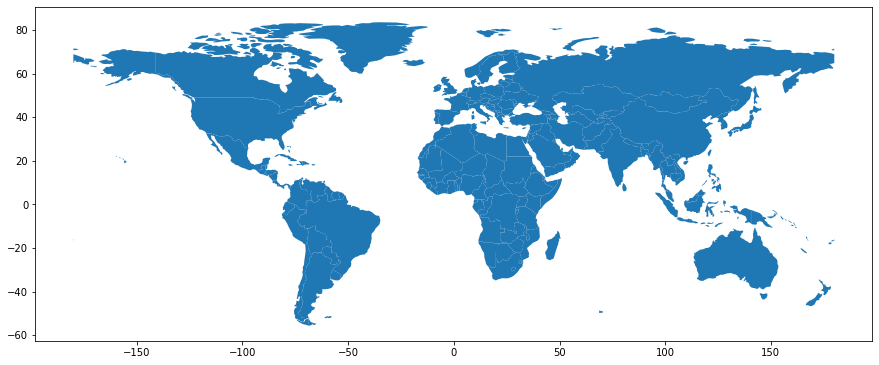

In [46]:
world.plot(figsize=(15,18));

<AxesSubplot:>

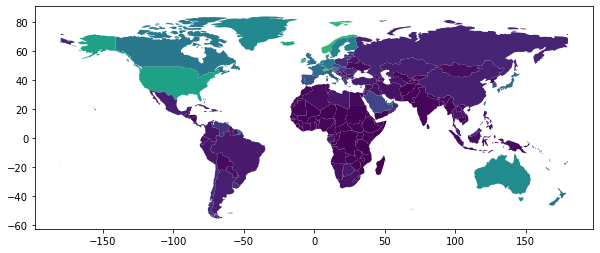

In [50]:
 # Plot by GDP per capita
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap',figsize=(10, 10),legend = False,)

<AxesSubplot:>

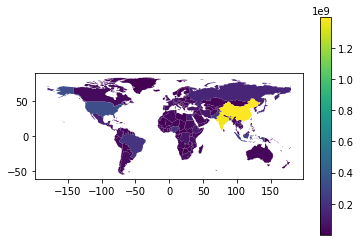

In [56]:
# Plot population estimates with an accurate legend

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est', ax=ax, figsize=(10, 10),legend=True)

<AxesSubplot:>

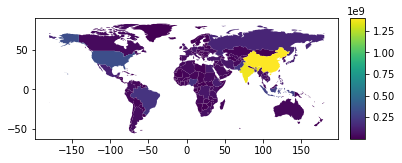

In [65]:
# Plot population estimates with an accurate legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='pop_est', ax=ax, legend = True, figsize = (10,10), cax=cax)

<AxesSubplot:>

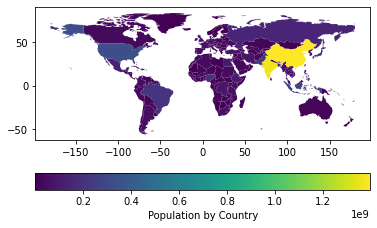

In [67]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           figsize = (10,10),
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})